# Project Part 1: Predicting Song Popularity Score

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/cdinh92/CS39AA-project/blob/main/project_part1.ipynb)

Welcome to the data science project undertaken for the CS39AA NLP Machine Learning class at MSU Denver. In this exploration, the aim is to delve into the world of music industry and investigate whether a predictive model can be designed to forecast the success of songs based on the popularity scores. The focus of this analysis lies on 8 key song features: danceability, energy, mode, loudness, speechiness, instrumentalness, tempo, and valence.

## 1. Introduction/Background

In this project, I will input almost 30,000 songs from the Spotify API provided by Joakim Arvidsson on [Kaggle](https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs). This is an 23-column database with 32833 popular songs mostly from the 2010s to 2020. I will use only 8 features mentioned above as well as 8 corresponding columns in the database to train the model and test the accuracy of the result.

**8 Key Feature Definitions:**
_(Use the same column's names from the dataset)_

| Feature | Description |
| --- | ----------- |
| **track_popularity** | Song Popularity (0-100) where higher is better |
| mode | indicates the modality (major or minor) of a track. Major is represented by 1 and minor is 0 |
| danceability | Danceability describes how suitable a track is for dancing. A value of 0.0 is least danceable and 1.0 is most danceable. |
| energy | Scale (0.0-1.0). Energetic tracks  feel fast, loud, and noisy. |
| loudness | The overall loudness of a track in decibels (dB) (-60 and 0 db). |
| speechiness | Speechiness detects the presence of spoken words in a track. Values above 0.66 describe tracks that are probably made entirely of spoken words |
| instrumentalness | Values above 0.5 are intended to represent instrumental tracks. |
| tempo | The overall estimated tempo of a track in beats per minute (BPM). |
| valence | The higher the value, the more positive mood for the song |

**Initial Prediction:**
_Anticipating the factors that contribute to a song's popularity is a complex task. I guess that danceability, energy, tempo, and particularly valence might emerge as key components influencing a song's popularity scores. However, it is crucial to acknowledge the broader context of the music industry, where artist names and the strategic marketing by big companies often play much more significant influence. The dynamics of the industry mean that independent artists may face unique challenges in breaking into mainstream charts._

**Alternative Approach:**
_While recognizing the potential limitations of predictive models in capturing the entirety of a song's success factors, this project might also seeks to identify common features among trending songs, just in case the predictive results are far from expectations._

**ABOUT THE PREDICTING MODEL**

_The model follows the concept of **regression** where a model explores the relationship between a variety of diverse features and a desired outcome. In this case, the dataset consists of input features (valence, mode, energy,...) and corresponding output targets (the actual popularity scores of the songs). The goal is to train the model to make accurate predictions based on new inputs._

_The model then will be used to predict the popularity scores from another dataset: Spotify top 50 songs in 2021 on [Kaggle](https://www.kaggle.com/datasets/equinxx/spotify-top-50-songs-in-2021). This will be the primary test to check how accurate the predicting model performs on recent music taste._

## 2. Exploratory Data Analysis

Let's explore the dataset and see if we could trim the dataset and eliminate irrelevant columns.

In [2]:
# import all of the python modules/packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# read the csv file
# raw_df = pd.read_csv("https://raw.githubusercontent.com/cdinh92/CS39AA-Project/main/spotify_songs.csv")
raw_df = pd.read_csv('spotify_songs.csv')
raw_df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


**1. Modify the dataset**

There are 32833 songs in the file. I will check for duplicated elements, null values, and drop some columns

In [3]:
# Check for null columns
raw_df.isna().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

There are 3 columns: ***track_name***, ***track_artist***, and ***track_album_name*** contain null values. I will leave them here because these are non-significant features for the model (I will drop them all at the end)

In [4]:
# Create a 'year' column into which we will rewrite the year corresponding to the song’s release
def extract_year(date_str):
        return pd.to_datetime(date_str, format = 'mixed').year

raw_df['year'] = raw_df['track_album_release_date'].apply(extract_year)
raw_df1 = raw_df.drop(columns=['track_album_release_date'])

# Remove duplicated songs by 'track_id' and keep only one first value of the occurences 
raw_df1 = raw_df.drop_duplicates(subset=['track_id'], keep='first', inplace=False)
raw_df1.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
count,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.00000,28356.000000,28356.000000
mean,39.329771,0.653372,0.698388,5.368000,-6.817696,0.565489,0.107954,0.177176,0.091117,0.190958,0.510387,120.95618,226575.967026,2011.054027
std,23.702376,0.145785,0.183503,3.613904,3.036243,0.495701,0.102556,0.222803,0.232548,0.155894,0.234340,26.95456,61078.450819,11.229221
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,4000.000000,1957.000000
25%,21.000000,0.561000,0.579000,2.000000,-8.309250,0.000000,0.041000,0.014375,0.000000,0.092600,0.329000,99.97200,187742.000000,2008.000000
50%,42.000000,0.670000,0.722000,6.000000,-6.261000,1.000000,0.062600,0.079700,0.000021,0.127000,0.512000,121.99300,216933.000000,2016.000000
75%,58.000000,0.760000,0.843000,9.000000,-4.709000,1.000000,0.133000,0.260000,0.006570,0.249000,0.695000,133.99900,254975.250000,2019.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.44000,517810.000000,2020.000000


The dataset is reduced to 28356 songs after remove duplicated elements. However, I want to use only ***songs released from the 2015 to 2020*** for the modern music taste because we will use the dataset to train the model to predict the popular songs in the 2021 Spotify dataset.

In [5]:
raw_df2 = raw_df1[raw_df1['year'] > 2015]
raw_df2.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
count,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000
mean,43.586198,0.669617,0.689789,5.341106,-6.500962,0.538827,0.115358,0.194996,0.107502,0.184910,0.467774,121.586692,205219.636985,2018.191558
std,21.549536,0.136614,0.184213,3.626014,2.897056,0.498507,0.105245,0.233169,0.255683,0.146605,0.226222,26.455986,52388.860291,1.122590
min,0.000000,0.077100,0.000175,0.000000,-46.448000,0.000000,0.023000,0.000001,0.000000,0.013100,0.000010,35.477000,31429.000000,2016.000000
25%,30.000000,0.586000,0.574000,2.000000,-7.829000,0.000000,0.044500,0.018500,0.000000,0.095400,0.291000,100.052000,174800.000000,2017.000000
50%,45.000000,0.684000,0.712000,6.000000,-5.980000,1.000000,0.069800,0.098000,0.000016,0.124000,0.460000,123.009000,199521.000000,2019.000000
75%,59.000000,0.767000,0.833000,8.000000,-4.567000,1.000000,0.147000,0.292000,0.007700,0.230000,0.638000,134.970000,226160.000000,2019.000000
max,100.000000,0.983000,1.000000,11.000000,1.135000,1.000000,0.918000,0.992000,0.994000,0.988000,0.981000,220.252000,517810.000000,2020.000000


Now, the dataset has nearly 15000 songs which is ready for futher steps in the **Training Model** part.

In [6]:
""" These steps are for download the filtered dataframe: """
# Specify the file name
csv_file_name = 'filtered_spotify_songs.csv'
# Export the DataFrame to a CSV file
raw_df2.to_csv(csv_file_name, index=False)
from IPython.display import FileLink
# Create a link to download the CSV file
FileLink(r'filtered_spotify_songs.csv')

/Users/deanbogardus/Desktop/School/NPL Machine Learning 39AA/Github/CS39AA-Project/filtered_spotify_songs.csv

In [8]:
# Check the filtered spotify songs csv file
# data = pd.read_csv("https://raw.githubusercontent.com/cdinh92/CS39AA-Project/main/filtered_spotify_songs.csv")
data = pd.read_csv("filtered_spotify_songs.csv")
data.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
count,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000
mean,43.586198,0.669617,0.689789,5.341106,-6.500962,0.538827,0.115358,0.194996,0.107502,0.184910,0.467774,121.586692,205219.636985,2018.191558
std,21.549536,0.136614,0.184213,3.626014,2.897056,0.498507,0.105245,0.233169,0.255683,0.146605,0.226222,26.455986,52388.860291,1.122590
min,0.000000,0.077100,0.000175,0.000000,-46.448000,0.000000,0.023000,0.000001,0.000000,0.013100,0.000010,35.477000,31429.000000,2016.000000
25%,30.000000,0.586000,0.574000,2.000000,-7.829000,0.000000,0.044500,0.018500,0.000000,0.095400,0.291000,100.052000,174800.000000,2017.000000
50%,45.000000,0.684000,0.712000,6.000000,-5.980000,1.000000,0.069800,0.098000,0.000016,0.124000,0.460000,123.009000,199521.000000,2019.000000
75%,59.000000,0.767000,0.833000,8.000000,-4.567000,1.000000,0.147000,0.292000,0.007700,0.230000,0.638000,134.970000,226160.000000,2019.000000
max,100.000000,0.983000,1.000000,11.000000,1.135000,1.000000,0.918000,0.992000,0.994000,0.988000,0.981000,220.252000,517810.000000,2020.000000


**2. Dataset Visualization**

***Figures: 8 key features vs. Popularity***

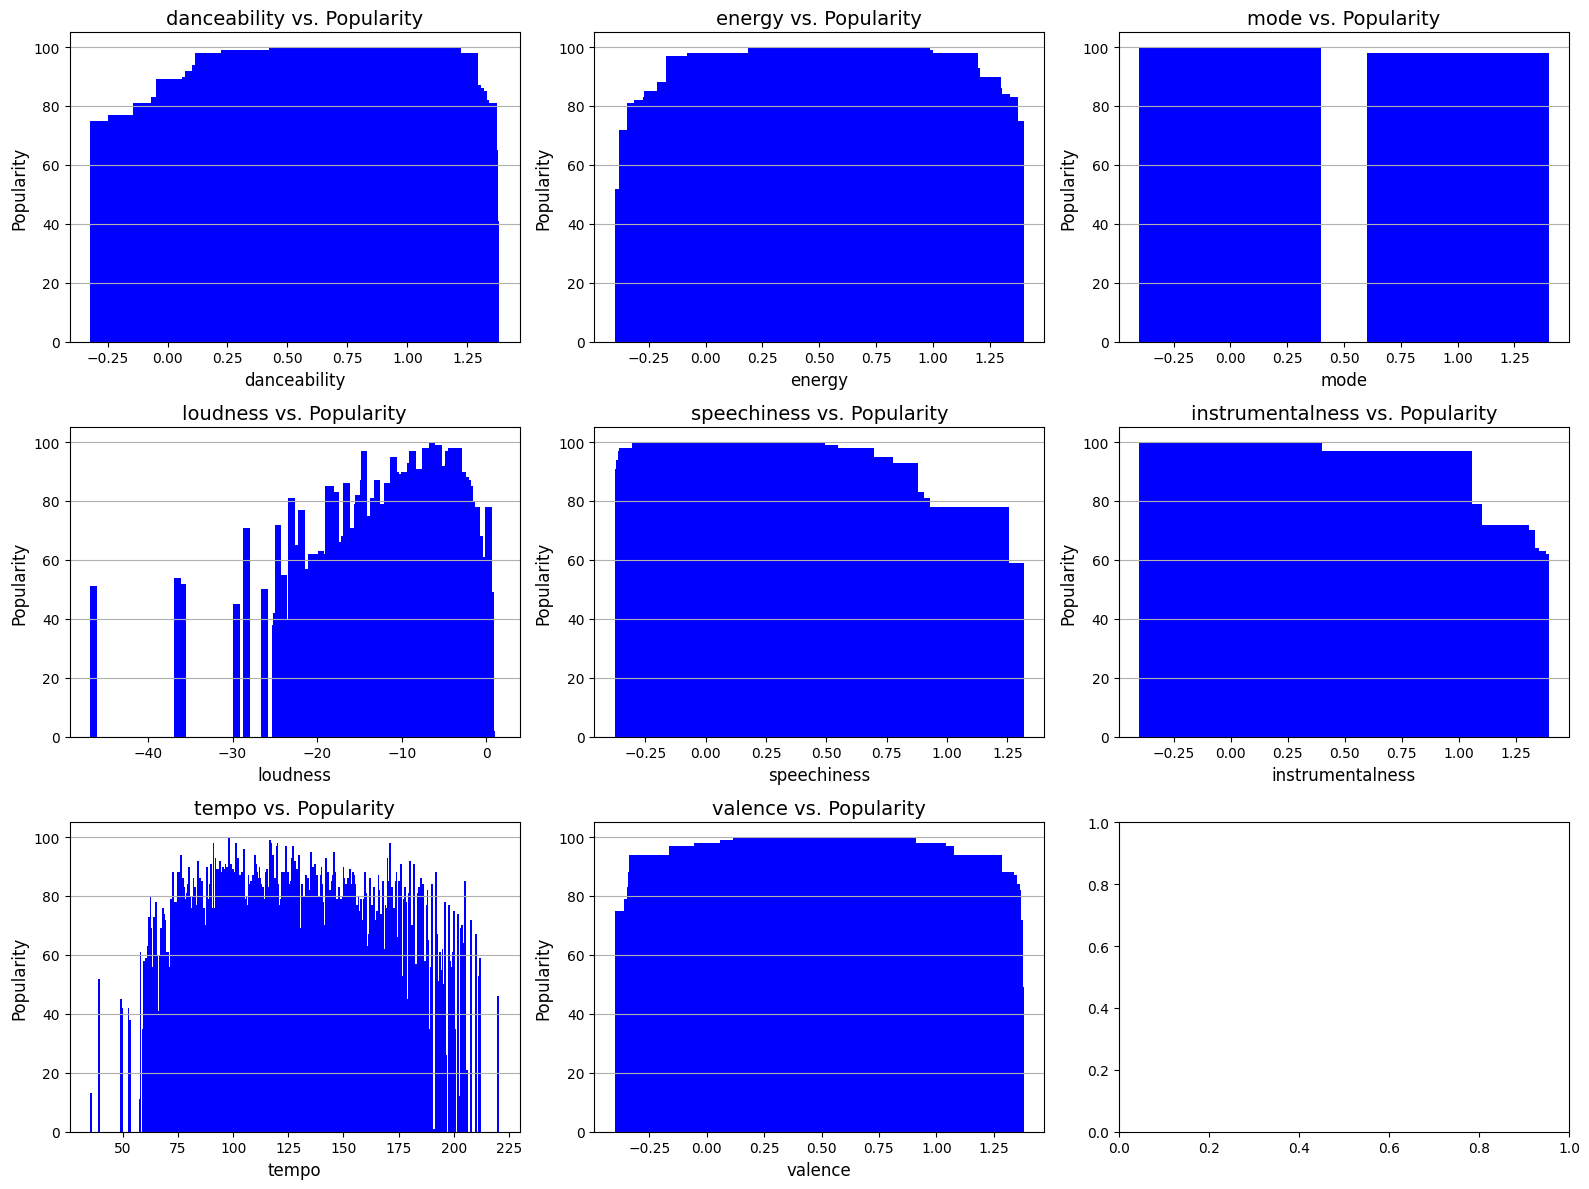

In [9]:
columns_to_plot = ['danceability', 'energy', 'mode', 'loudness', 'speechiness', 'instrumentalness', 'tempo', 'valence']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    plt.bar(data[column], data['track_popularity'], color='blue')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Popularity', fontsize=12)
    plt.title(f'{column} vs. Popularity', fontsize=14)
    plt.grid(axis='y')
plt.tight_layout()
plt.show()

***Figure: Top 10 Tracks by Popularity***

In [ ]:
# Sort the DataFrame by 'popularity' in descending order
top_10_tracks = data.sort_values(by='track_popularity', ascending=False).head(10)

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='track_popularity', y='track_name', data=top_10_tracks, palette='viridis')

# Customize the plot display
plt.title('Top 10 Tracks by Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Track Name')

# Show the plot
plt.show()